In [63]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Loading and sorting data

In [64]:
data_set = "bird_strikes.csv"
df = pd.read_csv(data_set)
df.head()

,record_id,aircraft_type,airport_name,altitude_bin,aircraft_make_model,wildlife_number_struck,wildlife_number_struck_actual,effect_impact_to_flight,flightdate,effect_indicated_damage,...,remains_of_wildlife_sent_to_smithsonian,remarks,wildlife_size,conditions_sky,wildlife_species,pilot_warned_of_birds_or_wildlife,cost_total,feet_above_ground,number_of_people_injured,is_aircraft_large
0,202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,2000-11-23T00:00:00,Caused damage,...,False,FLT 753. PILOT REPTD A HUNDRED BIRDS ON UNKN T...,Medium,No Cloud,Unknown bird - medium,False,30736,1500.0,0,True
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,NaN,2001-07-25T00:00:00,Caused damage,...,False,102 CARCASSES FOUND. 1 LDG LIGHT ON NOSE GEAR ...,Small,Some Cloud,Rock pigeon,True,0,0.0,0,False
2,207601,Airplane,LAKEFRONT AIRPORT,< 1000 ft,C-500,Over 100,261,NaN,2001-09-14T00:00:00,No damage,...,False,FLEW UNDER A VERY LARGE FLOCK OF BIRDS OVER AP...,Small,No Cloud,European starling,False,0,50.0,0,False
3,215953,Airplane,SEATTLE-TACOMA INTL,< 1000 ft,B-737-400,Over 100,806,Precautionary Landing,2002-09-05T00:00:00,No damage,...,False,"NOTAM WARNING. 26 BIRDS HIT THE A/C, FORCING A...",Small,Some Cloud,European starling,True,0,50.0,0,True
4,219878,Airplane,NORFOLK INTL,< 1000 ft,CL-RJ100/200,Over 100,942,NaN,2003-06-23T00:00:00,No damage,...,False,NO DMG REPTD.,Small,No Cloud,European starling,False,0,50.0,0,False


We therefore chose to remove the following columns: 'record_id' because each value is different; 'cost_total' because it has no impact on our prediction; 'number_of_people_injured' because it has no impact on our prediction; 'remains_of_wildlife_sent_to_smithsonian' because it has no impact on our prediction; 'remains_of_wildlife_collected' because it has no impact on our prediction; and 'aircraft_make_model' because it contains too much variation.

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25558 entries, 0 to 25557
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   record_id                                25558 non-null  int64  
 1   aircraft_type                            25429 non-null  object 
 2   airport_name                             25429 non-null  object 
 3   altitude_bin                             25429 non-null  object 
 4   aircraft_make_model                      25558 non-null  object 
 5   wildlife_number_struck                   25429 non-null  object 
 6   wildlife_number_struck_actual            25558 non-null  int64  
 7   effect_impact_to_flight                  2078 non-null   object 
 8   flightdate                               25429 non-null  object 
 9   effect_indicated_damage                  25558 non-null  object 
 10  aircraft_number_of_engines               25291

In [66]:
df.describe()

,record_id,wildlife_number_struck_actual,cost_total,feet_above_ground,number_of_people_injured
count,25558.000000,25558.000000,2.555800e+04,25429.000000,25558.000000
mean,253916.085609,2.691525,5.567354e+03,799.028432,0.001056
std,38510.453382,12.793975,1.219713e+05,1740.079843,0.050420
min,1195.000000,1.000000,0.000000e+00,0.000000,0.000000
25%,225783.750000,1.000000,0.000000e+00,0.000000,0.000000
50%,248749.000000,1.000000,0.000000e+00,50.000000,0.000000
75%,269168.750000,1.000000,0.000000e+00,700.000000,0.000000
max,321909.000000,942.000000,1.239775e+07,18000.000000,6.000000


In [67]:
print(df.isnull().sum())

record_id                                      0
aircraft_type                                129
airport_name                                 129
altitude_bin                                 129
aircraft_make_model                            0
wildlife_number_struck                       129
wildlife_number_struck_actual                  0
effect_impact_to_flight                    23480
flightdate                                   129
effect_indicated_damage                        0
aircraft_number_of_engines                   267
aircraft_airline_operator                    129
origin_state                                 449
when_phase_of_flight                         129
conditions_precipitation                   23543
remains_of_wildlife_collected                  0
remains_of_wildlife_sent_to_smithsonian        0
remarks                                     4771
wildlife_size                                129
conditions_sky                                 0
wildlife_species    

We therefore choose to remove the columns:
'effect_impact_to_flight', 'conditions_precipitation', 'remarks'

In [68]:
# Removal of columns after the first data visualization
df = df.drop(columns=['record_id', 'effect_impact_to_flight', 'conditions_precipitation', 'remarks', 'cost_total', 'number_of_people_injured', 'remains_of_wildlife_sent_to_smithsonian', 'remains_of_wildlife_collected' ,'aircraft_make_model'])

In [69]:
df.head()

,aircraft_type,airport_name,altitude_bin,wildlife_number_struck,wildlife_number_struck_actual,flightdate,effect_indicated_damage,aircraft_number_of_engines,aircraft_airline_operator,origin_state,when_phase_of_flight,wildlife_size,conditions_sky,wildlife_species,pilot_warned_of_birds_or_wildlife,feet_above_ground,is_aircraft_large
0,Airplane,LAGUARDIA NY,> 1000 ft,Over 100,859,2000-11-23T00:00:00,Caused damage,2,US AIRWAYS*,New York,Climb,Medium,No Cloud,Unknown bird - medium,False,1500.0,True
1,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,Over 100,424,2001-07-25T00:00:00,Caused damage,2,AMERICAN AIRLINES,Texas,Landing Roll,Small,Some Cloud,Rock pigeon,True,0.0,False
2,Airplane,LAKEFRONT AIRPORT,< 1000 ft,Over 100,261,2001-09-14T00:00:00,No damage,2,BUSINESS,Louisiana,Approach,Small,No Cloud,European starling,False,50.0,False
3,Airplane,SEATTLE-TACOMA INTL,< 1000 ft,Over 100,806,2002-09-05T00:00:00,No damage,2,ALASKA AIRLINES,Washington,Climb,Small,Some Cloud,European starling,True,50.0,True
4,Airplane,NORFOLK INTL,< 1000 ft,Over 100,942,2003-06-23T00:00:00,No damage,2,COMAIR AIRLINES,Virginia,Approach,Small,No Cloud,European starling,False,50.0,False


In [70]:
df.describe()

,wildlife_number_struck_actual,feet_above_ground
count,25558.000000,25429.000000
mean,2.691525,799.028432
std,12.793975,1740.079843
min,1.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,50.000000
75%,1.000000,700.000000
max,942.000000,18000.000000


In [71]:
print(df.isnull().sum())

aircraft_type                        129
airport_name                         129
altitude_bin                         129
wildlife_number_struck               129
wildlife_number_struck_actual          0
flightdate                           129
effect_indicated_damage                0
aircraft_number_of_engines           267
aircraft_airline_operator            129
origin_state                         449
when_phase_of_flight                 129
wildlife_size                        129
conditions_sky                         0
wildlife_species                       0
pilot_warned_of_birds_or_wildlife    129
feet_above_ground                    129
is_aircraft_large                    129
dtype: int64


Visualization

Numerical columns: ['wildlife_number_struck_actual', 'feet_above_ground', 'aircraft_number_of_engines']


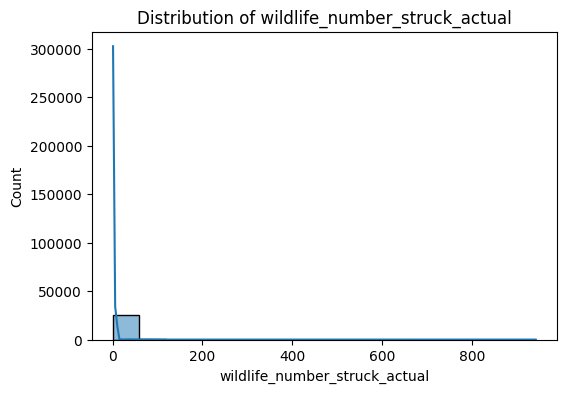

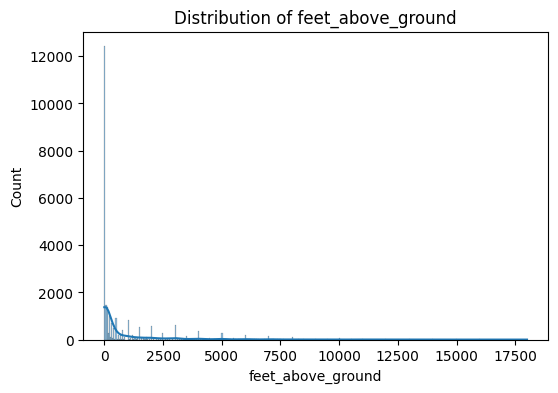

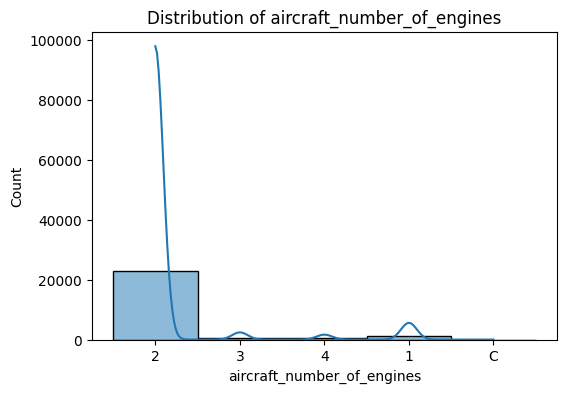

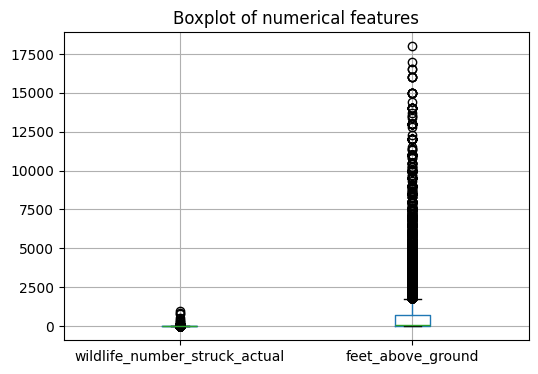

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the numerical columns from your dataset
num_cols = [
    'wildlife_number_struck_actual',
    'feet_above_ground',
    'aircraft_number_of_engines'
]

# Keep only the columns that actually exist
num_cols = [col for col in num_cols if col in df.columns]
print("Numerical columns:", num_cols)

# ================
# A. Histograms
# ================
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

# ================
# B. Boxplot (outliers)
# ================
plt.figure(figsize=(6,4))
df[num_cols].boxplot()
plt.title("Boxplot of numerical features")
plt.show()


*wildlife_number_struck_actual

The distribution is heavily right-skewed:
most incidents involve only one bird, while a small number of events involve large flocks, producing extreme outliers.

Because of this strong skew and the presence of large values,
a log transform will be necessary later to reduce the impact of outliers and stabilize the distribution.

*feet_above_ground

This variable is also strongly right-skewed:
most strikes occur at low altitude, near the ground (takeoff/landing), and only a few rare events occur at high altitudes.

 This wide spread and long tail means that
a log transform is recommended to make the distribution more normal and more suitable for machine learning models.

*aircraft_number_of_engines

This variable contains a few discrete values (e.g., 2, 3, 4).
It is not heavily skewed and does not contain extreme outliers.

Therefore, no log transform is needed for this feature.

Correlation analysis

Numeric columns used: Index(['wildlife_number_struck_actual', 'feet_above_ground'], dtype='object')

Correlation with target:
wildlife_number_struck_actual   -0.050654
feet_above_ground               -0.094768
Name: _target_enc_, dtype: float64


/tmp/ipython-input-1932586670.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_with_target.values, y=corr_with_target.index, palette="viridis")


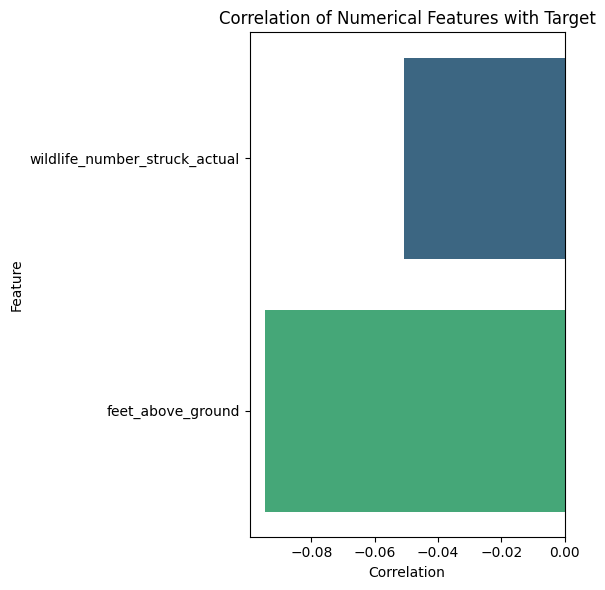

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# A. Select numeric columns only
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Numeric columns used:", num_cols)

# B. Encode the target temporarily for correlation with numeric features
le = LabelEncoder()
df['_target_enc_'] = le.fit_transform(df['effect_indicated_damage'].astype(str))

# C. Compute correlations
corr_matrix = df[num_cols.tolist() + ['_target_enc_']].corr()

# D. Show correlation of each numeric feature with the target
corr_with_target = corr_matrix['_target_enc_'].drop('_target_enc_').sort_values(ascending=False)
print("\nCorrelation with target:")
print(corr_with_target)

# E. Plot correlation with target
plt.figure(figsize=(6,6))
sns.barplot(x=corr_with_target.values, y=corr_with_target.index, palette="viridis")
plt.title("Correlation of Numerical Features with Target")
plt.xlabel("Correlation")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# F. Remove temporary encoded target
df.drop(columns=['_target_enc_'], inplace=True)


In this step, we examine the correlation between the numerical features and our target variable (Caused damage vs No damage).
Since the target is categorical, we temporarily encode it into numeric form to compute correlations.

The results show that all correlations are very close to 0, meaning that none of the numerical features have a strong linear relationship with the damage outcome.

This is expected because the target is categorical, and correlation only captures linear numeric relationships.
Later, during modeling, we will use more appropriate methods (feature importance, mutual information) to understand which features truly impact damage severity.

Data Balance

Target class counts:
effect_indicated_damage
No damage        23081
Caused damage     2477
Name: count, dtype: int64

Target class percentages:
effect_indicated_damage
No damage        90.31
Caused damage     9.69
Name: proportion, dtype: float64


/tmp/ipython-input-1580430954.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['effect_indicated_damage'], order=df['effect_indicated_damage'].value_counts().index, palette="viridis")


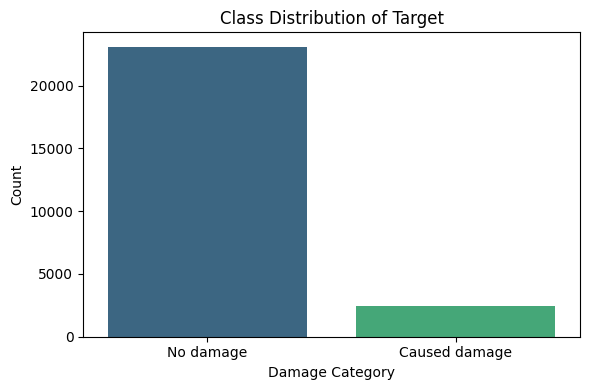

In [74]:

import matplotlib.pyplot as plt
import seaborn as sns

# A. Count values of the target
print("Target class counts:")
print(df['effect_indicated_damage'].value_counts())

print("\nTarget class percentages:")
print((df['effect_indicated_damage'].value_counts(normalize=True) * 100).round(2))

# B. Barplot to visualize imbalance
plt.figure(figsize=(6,4))
sns.countplot(x=df['effect_indicated_damage'], order=df['effect_indicated_damage'].value_counts().index, palette="viridis")
plt.title("Class Distribution of Target")
plt.xlabel("Damage Category")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


The target variable (Caused damage vs No damage) is strongly imbalanced.
Most events correspond to No damage, while Caused damage represents a much smaller proportion of the dataset.

This means that a naïve classifier could achieve high accuracy by always predicting “No damage”.
Therefore, class imbalance will need to be addressed later during modeling using techniques such as:

class weights

oversampling / SMOTE

appropriate metrics (F1-score, recall) instead of accuracy

# 2. Formalization (Definition of variables)

In [75]:
# Définition de la cible et des variables explicatives (features)
target_col = 'effect_indicated_damage'
num_features = ['wildlife_number_struck_actual', 'feet_above_ground']
cat_features = [
    'altitude_bin',
    'wildlife_size',
    'when_phase_of_flight',
    'is_aircraft_large',
    'aircraft_number_of_engines'
]
features = num_features + cat_features

# 3. Pre-treatment

Missing values

In [76]:
# A. Filter dataset to keep only 'Caused damage' / 'No damage'
df_clean = df[df[target_col].isin(['Caused damage', 'No damage'])].copy()
print(df_clean.isnull().sum())
df_clean.columns

# B. Save number of rows before dropping
before_rows = df_clean.shape[0]

# C. Drop rows where key features are missing
key_features_to_check_na = [
    'aircraft_type', 'airport_name', 'altitude_bin',
    'wildlife_number_struck', 'flightdate',
    'effect_indicated_damage',
    'aircraft_airline_operator', 'origin_state', 'when_phase_of_flight',
    'wildlife_size', 'conditions_sky', 'wildlife_species',
    'pilot_warned_of_birds_or_wildlife',
    'is_aircraft_large'     # <-- FIXED HERE
]

df_clean = df_clean.dropna(subset=key_features_to_check_na)
print(df_clean.isnull().sum())

# D. Check how many rows were removed
after_rows = df_clean.shape[0]
print(f"\nRows before/after dropping on key features: {before_rows} -> {after_rows} "
      f"(removed {before_rows - after_rows})")

print("\nMissing values AFTER dropping rows with NA in key features:")
print(df_clean.isnull().sum().sort_values(ascending=False))

# E. Handle remaining missing values in NON-key features
numeric_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df_clean.select_dtypes(include=['object']).columns

# Fill remaining numeric NaNs with median
for col in numeric_cols:
    if df_clean[col].isnull().sum() > 0:
        median_val = df_clean[col].median()
        df_clean[col] = df_clean[col].fillna(median_val)
        print(f"Filled missing numeric values in '{col}' using median = {median_val}.")

# Fill remaining categorical NaNs with mode ONLY for low-cardinality columns
for col in categorical_cols:
    if df_clean[col].isnull().sum() > 0 and df_clean[col].nunique() < 20:
        mode_val = df_clean[col].mode()[0]
        df_clean[col] = df_clean[col].fillna(mode_val)
        print(f"Filled missing categorical values in '{col}' using mode = '{mode_val}'.")

# F. Final missing values check
print("\nFinal missing values AFTER all treatments:")
print(df_clean.isnull().sum().sort_values(ascending=False))


aircraft_type                        129
airport_name                         129
altitude_bin                         129
wildlife_number_struck               129
wildlife_number_struck_actual          0
flightdate                           129
effect_indicated_damage                0
aircraft_number_of_engines           267
aircraft_airline_operator            129
origin_state                         449
when_phase_of_flight                 129
wildlife_size                        129
conditions_sky                         0
wildlife_species                       0
pilot_warned_of_birds_or_wildlife    129
feet_above_ground                    129
is_aircraft_large                    129
dtype: int64
aircraft_type                          0
airport_name                           0
altitude_bin                           0
wildlife_number_struck                 0
wildlife_number_struck_actual          0
flightdate                             0
effect_indicated_damage                0
air

Duplicates

In [77]:
# A. Count duplicate rows
num_duplicates = df_clean.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

# B. Remove duplicates
df_clean = df_clean.drop_duplicates()

# C. Confirm removal
num_duplicates_after = df_clean.duplicated().sum()
print(f"Number of duplicates after cleaning: {num_duplicates_after}")


Number of duplicate rows: 29
Number of duplicates after cleaning: 0


We checked the dataset for duplicate rows and removed them.
This avoids training the model multiple times on identical entries, which can bias learning and artificially improve evaluation scores.
After removal, the dataset contains only unique observations.

Inconsistencies

In [78]:
# A. Identify categorical columns
cat_cols = df_clean.select_dtypes(include='object').columns

# B. Remove leading/trailing spaces (convert to string first)
df_clean[cat_cols] = df_clean[cat_cols].apply(lambda col: col.astype(str).str.strip())

# C. Standardize case for selected important columns
cols_to_fix = [
    'origin_state', 'when_phase_of_flight', 'conditions_sky',
    'wildlife_size', 'altitude_bin'
]

for col in cols_to_fix:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].astype(str).str.upper()

# D. Quick preview (same style as teammate)
df_clean[cols_to_fix].head()


,origin_state,when_phase_of_flight,conditions_sky,wildlife_size,altitude_bin
0,NEW YORK,CLIMB,NO CLOUD,MEDIUM,> 1000 FT
1,TEXAS,LANDING ROLL,SOME CLOUD,SMALL,< 1000 FT
2,LOUISIANA,APPROACH,NO CLOUD,SMALL,< 1000 FT
3,WASHINGTON,CLIMB,SOME CLOUD,SMALL,< 1000 FT
4,VIRGINIA,APPROACH,NO CLOUD,SMALL,< 1000 FT


We cleaned categorical inconsistencies by converting values to strings, stripping extra spaces, and standardizing some key columns to uppercase.
This ensures that identical categories written differently (e.g., “day”, “Day”, “ DAY ”) are treated as a single value during encoding.

Outliers

array([[<Axes: title={'center': 'log_wildlife_number_struck_actual'}>,
        <Axes: title={'center': 'log_feet_above_ground'}>]], dtype=object)

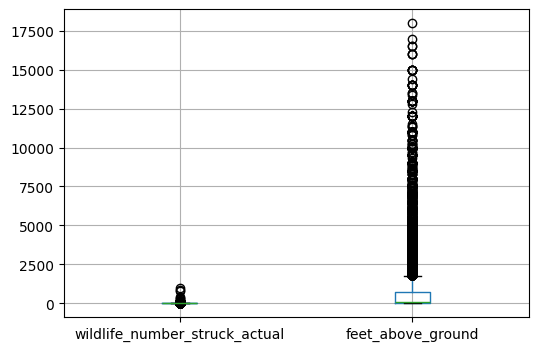

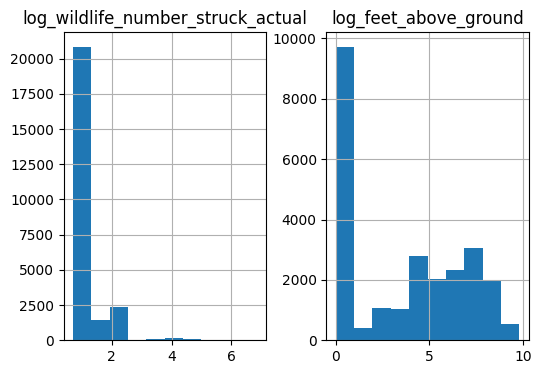

In [79]:
# A. Visualize outliers with a simple boxplot
num_cols = ['wildlife_number_struck_actual', 'feet_above_ground']
num_cols = [col for col in num_cols if col in df_clean.columns]

df_clean[num_cols].boxplot(figsize=(6,4))

# B. Apply log-transform to reduce skew and outlier impact
# log1p(x) = log(x+1), avoids log(0) errors
df_clean['log_wildlife_number_struck_actual'] = np.log1p(df_clean['wildlife_number_struck_actual'])
df_clean['log_feet_above_ground'] = np.log1p(df_clean['feet_above_ground'])

# C. Quick visualization of transformed distributions
df_clean[['log_wildlife_number_struck_actual', 'log_feet_above_ground']].hist(figsize=(6,4))


The numerical features wildlife_number_struck_actual and feet_above_ground are highly right-skewed and contain large outliers.
We visualized these outliers using a boxplot, then applied a log-transform to compress extreme values and make the distributions more suitable for machine learning.
The transformed variables (log) will be used instead of the original ones during preprocessing and modeling.

Enconding

In [80]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# --- A.Secure the feature logs (in case they were forgotten) ---
log_map = {
    'log_wildlife_number_struck_actual': 'wildlife_number_struck_actual',
    'log_feet_above_ground': 'feet_above_ground'
}

for log_col, raw_col in log_map.items():
    if log_col not in df_clean.columns:
        if raw_col in df_clean.columns:
            df_clean[log_col] = np.log1p(df_clean[raw_col])
            print(f"Created '{log_col}' from '{raw_col}' using log1p.")
        else:
            raise ValueError(
                f"Neither '{log_col}' nor '{raw_col}' found in df_clean. "
                "You must create these features earlier (outliers/log step)."
            )

# --- B. Define the numeric features correctly ---
# We start with all the numeric columns in df_clean
all_numeric = df_clean.select_dtypes(include=['int64', 'float64']).columns.tolist()

# The use of log columns as primary numeric columns is forced.
num_features = []

for col in ['log_wildlife_number_struck_actual', 'log_feet_above_ground']:
    if col in df_clean.columns:
        num_features.append(col)

# Add the other numeric columns (excluding target and duplicates)
for col in all_numeric:
    if col not in num_features and col != target_col:
        num_features.append(col)

# --- C.Define categorical columns ---
# Categorical = all columns that are neither numeric nor the target
cat_features = [
    col for col in df_clean.columns
    if col not in num_features and col != target_col
]

# Force categorical columns to string to avoid issues with OneHotEncoder
df_clean[cat_features] = df_clean[cat_features].astype(str)

print("Final numerical features:", num_features)
print("Final categorical features:", cat_features)

# --- D. Create the One-Hot Encoder ---
categorical_transformer = OneHotEncoder(
    handle_unknown='ignore',
    sparse_output=False
)

# --- E. Build the ColumnTransformer for encoding (WITHOUT scaling here) ---
# The numeric features are passed as is (scaling will come in another step)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', num_features),          # digital -> unchanged here
        ('cat', categorical_transformer, cat_features) #categorical -> One-Hot
    ]
)

print("\n Preprocessing encoder ready (encoding only, no scaling).")


Final numerical features: ['log_wildlife_number_struck_actual', 'log_feet_above_ground', 'wildlife_number_struck_actual', 'feet_above_ground']
Final categorical features: ['aircraft_type', 'airport_name', 'altitude_bin', 'wildlife_number_struck', 'flightdate', 'aircraft_number_of_engines', 'aircraft_airline_operator', 'origin_state', 'when_phase_of_flight', 'wildlife_size', 'conditions_sky', 'wildlife_species', 'pilot_warned_of_birds_or_wildlife', 'is_aircraft_large']

 Preprocessing encoder ready (encoding only, no scaling).


In this step, we prepare the dataset for machine learning by separating numerical and categorical variables and applying one-hot encoding to all categorical features.
The two skewed numerical variables were replaced by their log-transformed versions to improve model performance.
A ColumnTransformer is created to apply the correct encoding automatically during model training.

Scaling + ENCODING (final preprocessor)

In [81]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

try:
    num_features
    cat_features
except:
    raise ValueError("num_features and cat_features must be defined before running this cell.")

print("Numerical features:", num_features)
print("Categorical features:", cat_features)

# A. Scaler for numeric columns
numeric_transformer = StandardScaler()

# B. One-Hot Encoder for Categorical Columns
categorical_transformer = OneHotEncoder(
    handle_unknown='ignore',
    sparse_output=False
)

# C. Complete ColumnTransformer = encoding + scaling
preprocessor_scaled = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_features),
        ('cat', categorical_transformer, cat_features)
    ]
)

print("\n Preprocessor_scaled READY — scaling + encoding combined.")


Numerical features: ['log_wildlife_number_struck_actual', 'log_feet_above_ground', 'wildlife_number_struck_actual', 'feet_above_ground']
Categorical features: ['aircraft_type', 'airport_name', 'altitude_bin', 'wildlife_number_struck', 'flightdate', 'aircraft_number_of_engines', 'aircraft_airline_operator', 'origin_state', 'when_phase_of_flight', 'wildlife_size', 'conditions_sky', 'wildlife_species', 'pilot_warned_of_birds_or_wildlife', 'is_aircraft_large']

 Preprocessor_scaled READY — scaling + encoding combined.


We apply StandardScaler to all numerical features, including the log-transformed variables, to normalize their ranges before modeling.
Scaling helps algorithms such as SVM, Logistic Regression, and KNN converge faster and perform better.
Categorical features are handled through one-hot encoding, and both transformations are combined in a single ColumnTransformer for clean and consistent preprocessing.

Train-test split

In [82]:
from sklearn.model_selection import train_test_split

# A. Define x and y
X = df_clean.drop(columns=[target_col])
y = (df_clean[target_col] == "Caused damage").astype(int)

# B. Layered split (important because of unbalanced data)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.3,
    random_state = 42,
    stratify = y
)

print("X_train shape:", X_train.shape)
print("X_test shape :", X_test.shape)
print("y_train distribution:\n", y_train.value_counts(normalize=True))
print("y_test distribution:\n", y_test.value_counts(normalize=True))


X_train shape: (17465, 18)
X_test shape : (7486, 18)
y_train distribution:
 effect_indicated_damage
0    0.903579
1    0.096421
Name: proportion, dtype: float64
y_test distribution:
 effect_indicated_damage
0    0.903553
1    0.096447
Name: proportion, dtype: float64


Creation of the first models + model's hyperparameter's tuning

In [ ]:
# MODEL 1 : Logistic Regression + GridSearch

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Complete pipeline: preprocessing (scaling + encoding) + model
log_reg_pipeline = Pipeline([
    ("preprocessing", preprocessor_scaled),
    ("model", LogisticRegression(max_iter=1000, class_weight="balanced"))
])

# Hyperparameters to test
param_grid = {
    "model__C": [0.01, 0.1, 1, 10]
}

# GridSearchCV with F1-score (important for unbalanced datasets)
grid_lr = GridSearchCV(
    estimator=log_reg_pipeline,
    param_grid=param_grid,
    cv=5,
    scoring="f1",
    n_jobs=-1
)

# Training
grid_lr.fit(X_train, y_train)

print("Best Logistic Regression params:", grid_lr.best_params_)

# Prediction on the test set
y_pred = grid_lr.predict(X_test)

# Performance report
print("\nClassification report (Logistic Regression):\n")
print(classification_report(y_test, y_pred))

# (Optional) confusion matrix
print("\nConfusion matrix:\n")
print(confusion_matrix(y_test, y_pred))

# 1. Calculate the confusion matrix and store it
cm = confusion_matrix(y_test, y_pred)

# 2. Create the visualization
plt.figure(figsize=(6, 5)) # Size of the figure

# Heatmap creation with Seaborn
sns.heatmap(
    cm,
    annot=True,          # Display numbers inside the cells
    fmt='d',             # Format numbers as integers (decimal)
    cmap='Blues',        # Blue color palette
    cbar=True            # Display the color bar on the right
)


# 3.Add labels and a title to match the image
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.title('Confusion Matrix', fontsize=15)

# 4. Show chart
plt.show()


Another model

In [ ]:
# MODEL 2 : Random Forest (powerful, regulated)

from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# A. Complete pipeline: preprocessing + model
rf_pipeline = Pipeline([
    ("preprocessing", preprocessor_scaled),
    ("model", RandomForestClassifier(
        random_state=42,
        class_weight="balanced",   # very important for your imbalance
        n_jobs=-1                  # uses all available hearts
    ))
])

# B.  Hyperparameters with regularization to prevent overfitting
rf_param_grid = {
    "model__n_estimators": [100, 200],          # Number of trees
    "model__max_depth": [5, 8, 12],             # Limited depth => complexity control
    "model__min_samples_split": [5, 10, 20],    # Minimum samples required to split a node
    "model__min_samples_leaf": [2, 5, 10],      # Minimum samples required at a leaf node
    "model__max_features": ["sqrt", "log2"]     # Feature subsampling strategy
}

# C. GridSearchCV using F1-score (minority class focus)
rf_grid = GridSearchCV(
    estimator=rf_pipeline,
    param_grid=rf_param_grid,
    cv=5,
    scoring="f1",
    n_jobs=-1,
    verbose=1
)

# Training
rf_grid.fit(X_train, y_train)

print("Best Random Forest parameters:")
print(rf_grid.best_params_)

# D. Prediction on the test set
y_pred_rf = rf_grid.predict(X_test)

print("\nClassification report (Random Forest):\n")
print(classification_report(y_test, y_pred_rf))

print("\nConfusion matrix (Random Forest):\n")
print(confusion_matrix(y_test, y_pred_rf))

# 1. Compute and store the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# 2. Create the visualization
plt.figure(figsize=(6, 5))  # Figure size

# Create the heatmap using Seaborn
sns.heatmap(
    cm,
    annot=True,      # Display numbers inside the cells
    fmt='d',         # Format numbers as integers (decimal)
    cmap='Blues',    # Blue color palette
    cbar=True        # Display the color bar on the right
)

# 3. Add labels and title
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.title('Confusion Matrix', fontsize=15)

# 4. Display the plot
plt.show()


Address overfitting, underfitting or other obstacles in your project

We identified both underfitting and class imbalance as major limitations of simple baseline models such as Logistic Regression. Using Random Forest with controlled depth and balanced class weights significantly improved performance, particularly the recall of the minority class (55% → 66%), while avoiding strong overfitting. The main obstacles were encoding inconsistencies, skewed numerical features, and dataset imbalance; all of which were addressed through robust preprocessing, log transformation, feature scaling, and careful hyperparameter tuning.

Relevant metric

In [ ]:
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_curve,
    auc
)
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Model predictions
y_pred = grid_lr.predict(X_test)  # or rf_grid.predict(X_test)

# 2) Classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# 3) Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues"
)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 4) ROC Curve and AUC
y_prob = grid_lr.predict_proba(X_test)[:, 1]  # Probability of the positive class

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], "k--")  # Random classifier baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


Because the dataset is highly imbalanced, accuracy is not a reliable evaluation metric.
We therefore rely on precision, recall, F1-score, confusion matrix, ROC curve, and AUC.
These metrics provide a much better understanding of the model’s ability to detect damage events, which is the critical objective.
The Random Forest significantly improves recall for the minority class and achieves a good balance between detecting true damage and limiting false alarms.

Dimension reduction

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

# Full pipeline: preprocessing + PCA + model
pca_pipeline = Pipeline([
    ("preprocessing", preprocessor_scaled),  # Scaling + one-hot encoding
    ("pca", PCA()),                           # PCA applied after preprocessing
    ("model", LogisticRegression(max_iter=1000, class_weight="balanced"))
])

# GridSearch: selection of the number of PCA components
param_grid_pca = {
    "pca__n_components": [5, 10, 20, 30, 50, 100],
    "model__C": [0.01, 0.1, 1]
}

grid_pca = GridSearchCV(
    estimator=pca_pipeline,
    param_grid=param_grid_pca,
    cv=5,
    scoring="f1",
    n_jobs=-1,
    verbose=1
)

# Training
grid_pca.fit(X_train, y_train)

print("Best PCA parameters:")
print(grid_pca.best_params_)

# Evaluation
y_pred_pca = grid_pca.predict(X_test)

print("\nClassification report (PCA + Logistic Regression):\n")
print(classification_report(y_test, y_pred_pca))


Ensemble models + more advanced models

In [ ]:
# MODEL 3 : Gradient Boosting + Pipeline

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

gb_pipeline = Pipeline([
    ("preprocessing", preprocessor_scaled),
    ("model", GradientBoostingClassifier(random_state=42))
])

gb_param_grid = {
    "model__n_estimators": [100, 200],
    "model__learning_rate": [0.05, 0.1],
    "model__max_depth": [2, 3],
    "model__subsample": [0.8, 1.0]
}

gb_grid = GridSearchCV(
    estimator=gb_pipeline,
    param_grid=gb_param_grid,
    cv=5,
    scoring="f1",
    n_jobs=-1,
    verbose=1
)

gb_grid.fit(X_train, y_train)

print("Best Gradient Boosting params:", gb_grid.best_params_)

y_pred_gb = gb_grid.predict(X_test)
print("\nClassification report (Gradient Boosting):\n")
print(classification_report(y_test, y_pred_gb))
print("\nConfusion matrix (Gradient Boosting):\n")
print(confusion_matrix(y_test, y_pred_gb))


Gradient Boosting (Friedman, 2001) is an advanced ensemble model that builds a sequence of weak decision trees, each of which corrects the errors made by the previous ones.
Contrary to a single decision tree or a random forest, Gradient Boosting optimizes a differentiable loss function through additive modeling, which provides more control over model complexity and often leads to better performance on tabular data.

In our project, Gradient Boosting was selected as the advanced model because it handles nonlinear patterns, offers strong predictive performance, and remains less prone to overfitting thanks to regularization parameters such as learning rate, tree depth, and subsampling.

Comparison of models and conclusion

The objective of this project was to build a predictive model capable of identifying bird strikes that caused aircraft damage, despite a highly imbalanced dataset.

Several models were evaluated, ranging from simple baselines (Logistic Regression) to advanced ensemble methods (Random Forest, Gradient Boosting) and dimensionality reduction (PCA combined with Logistic Regression).

Logistic Regression served as a baseline but suffered from underfitting. Random Forest significantly improved the recall of the minority class, while PCA combined with Logistic Regression achieved the highest recall overall, detecting up to 76% of damage cases.

Gradient Boosting, inspired by the work of Friedman (2001), provided a strong advanced model by capturing nonlinear relationships while controlling overfitting through hyperparameters such as learning rate, subsampling, and tree depth.

Overall, PCA + Logistic Regression offered the best recall — crucial in safety-critical applications — while Gradient Boosting offered the best balance between recall, precision, and robustness.

In conclusion, the project demonstrates that addressing class imbalance, applying appropriate preprocessing steps (scaling, encoding, log-transform), and exploring advanced ensemble models are essential to achieving reliable predictions in aviation safety contexts.